<a href="https://colab.research.google.com/github/oroobyaseen/oroobyaseen/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation,MaxPooling2D,Dropout
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from tensorflow.keras.models import load_model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,LearningRateScheduler,CSVLogger,LambdaCallback,TensorBoard
from keras import regularizers
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import seaborn as sns
import math
import os

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
%matplotlib inline

In [18]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'
#test_path  = '/content/drive/MyDrive/New folder (6)/test'
train_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    channel_shift_range=10.,
    fill_mode="nearest"
)
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128)

valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224), 
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128, shuffle=False)
#test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    #classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128,shuffle=False)

Found 2516 images belonging to 3 classes.
Found 616 images belonging to 3 classes.


In [9]:
vgg19_model = VGG19() 
model_vgg19 = Sequential() 
for layer in vgg19_model.layers[:-1]: 
    model_vgg19.add(layer) 
for layer in model_vgg19.layers: 
    layer.trainable = False 
    
model_vgg19.add(Dense(3, activation='softmax'))

In [10]:
model_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:


model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

In [13]:
history = model_vgg19.fit_generator(generator=train_batches,
                                    #steps_per_epoch=len(train_batches),
                                 validation_data=valid_batches, 
                                 #validation_steps=len(valid_batches), 
                                    epochs=50, verbose=1,  callbacks=[model5_es, model5_rlr, model5_mcp])

<ipython-input-13-6c915f99ae88>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg19.fit_generator(generator=train_batches,


Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.6713

20/20 [==============================] - 45s 2s/step - loss: 0.4740 - accuracy: 0.6713 - val_loss: 0.3510 - val_accuracy: 0.7906 - lr: 0.0010
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.7778

20/20 [==============================] - 43s 2s/step - loss: 0.3470 - accuracy: 0.7778 - val_loss: 0.3071 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.3224 - accuracy: 0.7989

20/20 [==============================] - 44s 2s/step - loss: 0.3224 - accuracy: 0.7989 - val_loss: 0.3037 - val_accuracy: 0.8117 - lr: 0.0010
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.3028 - accuracy: 0.8192

20/20 [==============================] - 43s 2s/step - loss: 0.3028 - accuracy: 0.8192 - val_loss: 0.2940 - val_accuracy: 0.8279 - lr: 0.0010
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.8219

20/20 [==============================] - 43s 2s/step - loss: 0.2925 - accuracy: 0.8219 - val_loss: 0.2720 - val_accuracy: 0.8393 - lr: 0.0010
Epoch 6/50
20/20 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.8275

20/20 [==============================] - 44s 2s/step - loss: 0.2779 - accuracy: 0.8275 - val_loss: 0.2845 - val_accuracy: 0.8231 - lr: 0.0010
Epoch 7/50
20/20 [==============================] - ETA: 0s - loss: 0.2708 - accuracy: 0.8331

20/20 [==============================] - 43s 2s/step - loss: 0.2708 - accuracy: 0.8331 - val_loss: 0.2720 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 8/50
20/20 [==============================] - ETA: 0s - loss: 0.2765 - accuracy: 0.8295

20/20 [==============================] - 43s 2s/step - loss: 0.2765 - accuracy: 0.8295 - val_loss: 0.2653 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 9/50
20/20 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.8291

20/20 [==============================] - 43s 2s/step - loss: 0.2698 - accuracy: 0.8291 - val_loss: 0.2537 - val_accuracy: 0.8539 - lr: 0.0010
Epoch 10/50
20/20 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.8374

20/20 [==============================] - 44s 2s/step - loss: 0.2689 - accuracy: 0.8374 - val_loss: 0.2578 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8422

20/20 [==============================] - 43s 2s/step - loss: 0.2625 - accuracy: 0.8422 - val_loss: 0.2598 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 0.2537 - accuracy: 0.8466

20/20 [==============================] - 43s 2s/step - loss: 0.2537 - accuracy: 0.8466 - val_loss: 0.2455 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.8374

20/20 [==============================] - 44s 2s/step - loss: 0.2609 - accuracy: 0.8374 - val_loss: 0.2342 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 14/50
20/20 [==============================] - ETA: 0s - loss: 0.2467 - accuracy: 0.8514

20/20 [==============================] - 44s 2s/step - loss: 0.2467 - accuracy: 0.8514 - val_loss: 0.2505 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 15/50
20/20 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.8549

20/20 [==============================] - 43s 2s/step - loss: 0.2386 - accuracy: 0.8549 - val_loss: 0.2388 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.8502

20/20 [==============================] - 43s 2s/step - loss: 0.2500 - accuracy: 0.8502 - val_loss: 0.2487 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.8593

20/20 [==============================] - 43s 2s/step - loss: 0.2360 - accuracy: 0.8593 - val_loss: 0.2408 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.8597

20/20 [==============================] - 43s 2s/step - loss: 0.2306 - accuracy: 0.8597 - val_loss: 0.2472 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.8657
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


20/20 [==============================] - 43s 2s/step - loss: 0.2225 - accuracy: 0.8657 - val_loss: 0.2370 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.8776

20/20 [==============================] - 44s 2s/step - loss: 0.2159 - accuracy: 0.8776 - val_loss: 0.2384 - val_accuracy: 0.8490 - lr: 2.0000e-04
Epoch 21/50
20/20 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.8669

20/20 [==============================] - 43s 2s/step - loss: 0.2212 - accuracy: 0.8669 - val_loss: 0.2386 - val_accuracy: 0.8523 - lr: 2.0000e-04
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.8688

20/20 [==============================] - 43s 2s/step - loss: 0.2153 - accuracy: 0.8688 - val_loss: 0.2346 - val_accuracy: 0.8523 - lr: 2.0000e-04
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.8676

20/20 [==============================] - 43s 2s/step - loss: 0.2185 - accuracy: 0.8676 - val_loss: 0.2373 - val_accuracy: 0.8555 - lr: 2.0000e-04
Epoch 24/50
20/20 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.8712

20/20 [==============================] - 43s 2s/step - loss: 0.2146 - accuracy: 0.8712 - val_loss: 0.2357 - val_accuracy: 0.8571 - lr: 2.0000e-04
Epoch 25/50
20/20 [==============================] - ETA: 0s - loss: 0.2199 - accuracy: 0.8637

20/20 [==============================] - 43s 2s/step - loss: 0.2199 - accuracy: 0.8637 - val_loss: 0.2310 - val_accuracy: 0.8571 - lr: 2.0000e-04
Epoch 26/50
20/20 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.8831

20/20 [==============================] - 43s 2s/step - loss: 0.2161 - accuracy: 0.8831 - val_loss: 0.2312 - val_accuracy: 0.8620 - lr: 2.0000e-04
Epoch 27/50
20/20 [==============================] - ETA: 0s - loss: 0.2141 - accuracy: 0.8804

20/20 [==============================] - 45s 2s/step - loss: 0.2141 - accuracy: 0.8804 - val_loss: 0.2379 - val_accuracy: 0.8523 - lr: 2.0000e-04
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.8760

20/20 [==============================] - 43s 2s/step - loss: 0.2104 - accuracy: 0.8760 - val_loss: 0.2319 - val_accuracy: 0.8604 - lr: 2.0000e-04
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.8768

20/20 [==============================] - 43s 2s/step - loss: 0.2123 - accuracy: 0.8768 - val_loss: 0.2344 - val_accuracy: 0.8588 - lr: 2.0000e-04
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.8645

20/20 [==============================] - 43s 2s/step - loss: 0.2190 - accuracy: 0.8645 - val_loss: 0.2309 - val_accuracy: 0.8571 - lr: 2.0000e-04
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.8756

20/20 [==============================] - 43s 2s/step - loss: 0.2130 - accuracy: 0.8756 - val_loss: 0.2272 - val_accuracy: 0.8539 - lr: 2.0000e-04
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.2151 - accuracy: 0.8776

20/20 [==============================] - 43s 2s/step - loss: 0.2151 - accuracy: 0.8776 - val_loss: 0.2309 - val_accuracy: 0.8620 - lr: 2.0000e-04
Epoch 33/50
20/20 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.8720

20/20 [==============================] - 44s 2s/step - loss: 0.2178 - accuracy: 0.8720 - val_loss: 0.2246 - val_accuracy: 0.8604 - lr: 2.0000e-04
Epoch 34/50
20/20 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.8808

20/20 [==============================] - 43s 2s/step - loss: 0.2090 - accuracy: 0.8808 - val_loss: 0.2234 - val_accuracy: 0.8620 - lr: 2.0000e-04
Epoch 35/50
20/20 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.8728

20/20 [==============================] - 43s 2s/step - loss: 0.2166 - accuracy: 0.8728 - val_loss: 0.2283 - val_accuracy: 0.8685 - lr: 2.0000e-04
Epoch 36/50
20/20 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.8676

20/20 [==============================] - 43s 2s/step - loss: 0.2222 - accuracy: 0.8676 - val_loss: 0.2345 - val_accuracy: 0.8523 - lr: 2.0000e-04
Epoch 37/50
20/20 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.8736

20/20 [==============================] - 43s 2s/step - loss: 0.2128 - accuracy: 0.8736 - val_loss: 0.2280 - val_accuracy: 0.8588 - lr: 2.0000e-04
Epoch 38/50
20/20 [==============================] - ETA: 0s - loss: 0.2116 - accuracy: 0.8744

20/20 [==============================] - 43s 2s/step - loss: 0.2116 - accuracy: 0.8744 - val_loss: 0.2259 - val_accuracy: 0.8588 - lr: 2.0000e-04
Epoch 39/50
20/20 [==============================] - ETA: 0s - loss: 0.2154 - accuracy: 0.8831

20/20 [==============================] - 45s 2s/step - loss: 0.2154 - accuracy: 0.8831 - val_loss: 0.2306 - val_accuracy: 0.8588 - lr: 2.0000e-04
Epoch 40/50
20/20 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.8792
Epoch 40: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


20/20 [==============================] - 43s 2s/step - loss: 0.2075 - accuracy: 0.8792 - val_loss: 0.2293 - val_accuracy: 0.8539 - lr: 2.0000e-04
Epoch 41/50
20/20 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.8740

20/20 [==============================] - 43s 2s/step - loss: 0.2088 - accuracy: 0.8740 - val_loss: 0.2252 - val_accuracy: 0.8636 - lr: 4.0000e-05
Epoch 42/50
20/20 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.8756

20/20 [==============================] - 43s 2s/step - loss: 0.2156 - accuracy: 0.8756 - val_loss: 0.2261 - val_accuracy: 0.8604 - lr: 4.0000e-05
Epoch 43/50
20/20 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.8851

20/20 [==============================] - 43s 2s/step - loss: 0.2110 - accuracy: 0.8851 - val_loss: 0.2272 - val_accuracy: 0.8636 - lr: 4.0000e-05
Epoch 44/50
20/20 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.8859

20/20 [==============================] - 43s 2s/step - loss: 0.2088 - accuracy: 0.8859 - val_loss: 0.2264 - val_accuracy: 0.8571 - lr: 4.0000e-05
Epoch 45/50
20/20 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.8712

20/20 [==============================] - 43s 2s/step - loss: 0.2129 - accuracy: 0.8712 - val_loss: 0.2271 - val_accuracy: 0.8669 - lr: 4.0000e-05
Epoch 46/50
20/20 [==============================] - ETA: 0s - loss: 0.2121 - accuracy: 0.8816
Epoch 46: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.


20/20 [==============================] - 45s 2s/step - loss: 0.2121 - accuracy: 0.8816 - val_loss: 0.2270 - val_accuracy: 0.8636 - lr: 4.0000e-05
Epoch 47/50
20/20 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.8843

20/20 [==============================] - 43s 2s/step - loss: 0.2055 - accuracy: 0.8843 - val_loss: 0.2269 - val_accuracy: 0.8604 - lr: 8.0000e-06
Epoch 48/50
20/20 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.8847

20/20 [==============================] - 43s 2s/step - loss: 0.2067 - accuracy: 0.8847 - val_loss: 0.2266 - val_accuracy: 0.8604 - lr: 8.0000e-06
Epoch 49/50
20/20 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.8704

20/20 [==============================] - 43s 2s/step - loss: 0.2177 - accuracy: 0.8704 - val_loss: 0.2265 - val_accuracy: 0.8604 - lr: 8.0000e-06
Epoch 50/50
20/20 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.8839

20/20 [==============================] - 43s 2s/step - loss: 0.2064 - accuracy: 0.8839 - val_loss: 0.2264 - val_accuracy: 0.8636 - lr: 8.0000e-06


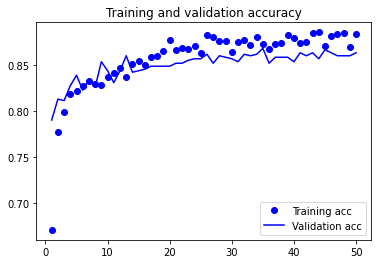

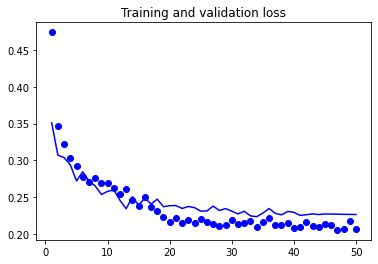

In [14]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.savefig('accuracy.png')
plt.show()

In [15]:
from tensorflow.keras.models import load_model

model_vgg19.save('model_vgg19.h5')

In [16]:
test_model = load_model('model_vgg19.h5')

<ipython-input-19-9fff1a42e9c6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)


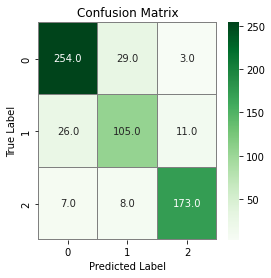

<Figure size 432x288 with 0 Axes>

In [19]:
predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)

pred_label = np.argmax(predictions_1,axis=1)
classes = np.argmax(predictions_1, axis=1)
cm = confusion_matrix(valid_batches.labels,pred_label)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix.png')

In [20]:
predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)

<ipython-input-20-556bd177d548>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)


In [21]:
rounded_prediction = np.argmax(predictions, axis=-1)
for i in rounded_prediction:
    print(i)

0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
2
0
2
0
1
0
0
0
1
0
0
0
0
0


In [22]:
test_imgs, test_labels = next(valid_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [23]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [24]:
cm = confusion_matrix(y_true=valid_batches.labels, y_pred=pred_label)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_true=valid_batches.labels, y_pred=pred_label))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       286
           1       0.74      0.74      0.74       142
           2       0.93      0.92      0.92       188

    accuracy                           0.86       616
   macro avg       0.85      0.85      0.85       616
weighted avg       0.86      0.86      0.86       616



Confusion matrix, without normalization
[[254  29   3]
 [ 26 105  11]
 [  7   8 173]]


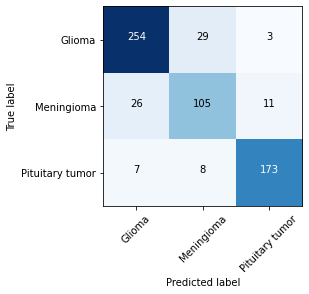

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Glioma','Meningioma', 'Pituitary tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [28]:
y_score = model_vgg19.predict_generator(valid_batches)


<ipython-input-28-7d1a0c8cb1d2>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_score = model_vgg19.predict_generator(valid_batches)


In [29]:
classes = dict((v, k) for k, v in valid_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(valid_batches)

In [30]:

from keras.utils.np_utils import to_categorical

In [31]:
y_true_categorical = valid_batches.classes
y_true = (to_categorical(y_true_categorical, num_classes = num_classes))


<ipython-input-32-ad3396a1dc6d>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


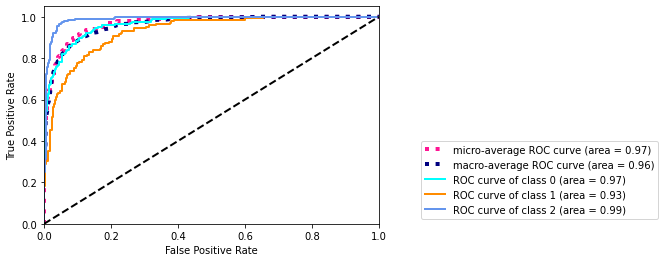

In [32]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#plt.title('Receiver operating characteristic (ROC) to Multi-Class Validation Set (' + model_name + ')')
plt.legend(bbox_to_anchor=(1.85,0), loc="lower right")
#plt.savefig(model_path + '0_results/Model' + '_' + model_name + '_' + str(epochs) + '_epochs_ROC_Validation.png', dpi=600, bbox_inches="tight")
plt.show()



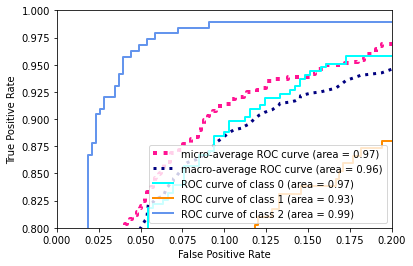

In [33]:

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-27-59624cc777e7>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


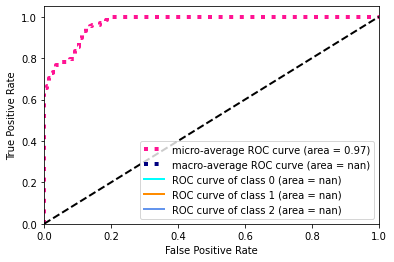

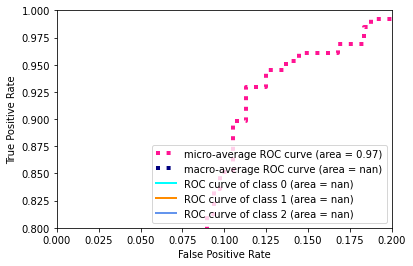

In [27]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
classes = dict((v, k) for k, v in test_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(test_batches)

In [ ]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [ ]:
def plot_roc_curve(y_test, y_pred):
     n_classes = len(np.unique(y_test))
     y_test = label_binarize(y_test, classes=np.arange(n_classes))

     # Compute ROC curve and ROC area for each class
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     thresholds = dict()
     for i in range(n_classes):
       fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
     roc_auc[i] = auc(fpr[i], tpr[i])

     # Compute micro-average ROC curve and ROC area
     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
     mean_tpr = np.zeros_like(all_fpr)
     for i in range(n_classes):
       mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
     mean_tpr /= n_classes

     fpr["macro"] = all_fpr
     tpr["macro"] = mean_tpr
     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
     plt.figure(dpi=600)
     lw = 2
     plt.plot(fpr["micro"], tpr["micro"],
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     color="deeppink", linestyle=":", linewidth=4,)

     plt.plot(fpr["macro"], tpr["macro"],
     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
     color="navy", linestyle=":", linewidth=4,)

     colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
     for i, color in zip(range(n_classes), colors):
       plt.plot(fpr[i], tpr[i], color=color, lw=lw,
       label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

     plt.plot([0, 1], [0, 1], "k--", lw=lw)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("Receiver Operating Characteristic (ROC) curve")
     plt.legend()

In [ ]:
test_model = load_model('model_vgg16.h5')

In [ ]:
plot_roc_curve(test_batches,  predictions )